In [1]:
import opendatasets as od

In [2]:
data='https://www.kaggle.com/datasets/arhamrumi/amazon-product-reviews'

In [3]:
od.download(data)

Skipping, found downloaded files in ".\amazon-product-reviews" (use force=True to force download)


In [4]:
import os

In [5]:
data_dir=r'.\amazon-product-reviews'

In [6]:
os.listdir(data_dir)

['.ipynb_checkpoints']

In [7]:
import pandas as pd 

In [8]:
data=pd.read_csv(r'Reviews.csv')

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [13]:
data.shape

(568454, 10)

In [14]:
data1= data[['Text','Score']]
data1.head()

,Text,Score
0,I have bought several of the Vitality canned d...,5
1,Product arrived labeled as Jumbo Salted Peanut...,1
2,This is a confection that has been around a fe...,4
3,If you are looking for the secret ingredient i...,2
4,Great taffy at a great price. There was a wid...,5


(5    363122
 4     80655
 1     52268
 3     42640
 2     29769
 Name: Score, dtype: int64,
 <AxesSubplot: >)

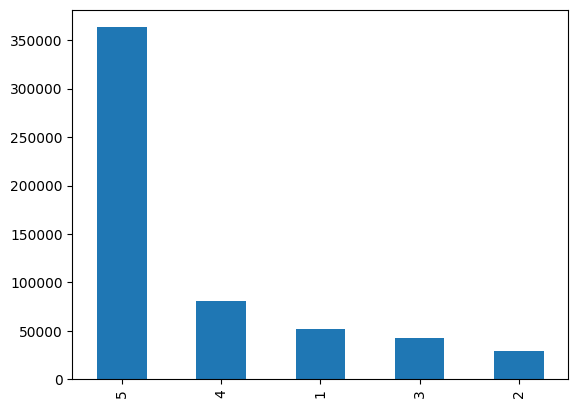

In [15]:
#count of each rating/score
data1.Score.value_counts(), data1.Score.value_counts().plot(kind='bar')

In [16]:
#check missing values:
data1.isna().sum()

Text     0
Score    0
dtype: int64

In [17]:
data1[data1.duplicated()]

,Text,Score
29,I don't know if it's the cactus or the tequila...,5
574,"I'm addicted to salty and tangy flavors, so wh...",5
603,"I'm addicted to salty and tangy flavors, so wh...",5
1973,The pork chops from Omaha Steaks were very tas...,3
2309,Too much of the white pith on this orange peel...,2
...,...,...
568409,I was very pleased with the ingredient quality...,5
568410,My main reason for the five star review has to...,5
568411,I bought this to try on two registered Maine C...,5
568412,When we brought home two 3-month-old purebred ...,5


In [18]:
data2=data1.drop_duplicates()
data2.head(), data2.shape

(                                                Text  Score
 0  I have bought several of the Vitality canned d...      5
 1  Product arrived labeled as Jumbo Salted Peanut...      1
 2  This is a confection that has been around a fe...      4
 3  If you are looking for the secret ingredient i...      2
 4  Great taffy at a great price.  There was a wid...      5,
 (393675, 2))

In [19]:
data2.Score.value_counts()

5    250745
4     56074
1     36280
3     29772
2     20804
Name: Score, dtype: int64

In [114]:
data2 = pd.DataFrame(data2)

# Set display option to show full column text
pd.set_option('display.max_colwidth', None)

In [131]:
data2.head(7)

,Text,Score,review
0,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.,5,Positive
1,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo"".",1,Negative
2,"This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar. And it is a tiny mouthful of heaven. Not too chewy, and very flavorful. I highly recommend this yummy treat. If you are familiar with the story of C.S. Lewis' ""The Lion, The Witch, and The Wardrobe"" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch.",4,Positive
3,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The flavor is very medicinal.,2,Negative
4,"Great taffy at a great price. There was a wide assortment of yummy taffy. Delivery was very quick. If your a taffy lover, this is a deal.",5,Positive
5,"I got a wild hair for taffy and ordered this five pound bag. The taffy was all very enjoyable with many flavors: watermelon, root beer, melon, peppermint, grape, etc. My only complaint is there was a bit too much red/black licorice-flavored pieces (just not my particular favorites). Between me, my kids, and my husband, this lasted only two weeks! I would recommend this brand of taffy -- it was a delightful treat.",4,Positive
6,"This saltwater taffy had great flavors and was very soft and chewy. Each candy was individually wrapped well. None of the candies were stuck together, which did happen in the expensive version, Fralinger's. Would highly recommend this candy! I served it at a beach-themed party and everyone loved it!",5,Positive


In [80]:
unique_texts = data2['Text'].unique()

# Print unique texts
print(unique_texts)

['I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'
 'Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".'
 'This is a confection that has been around a few centuries.  It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar.  And it is a tiny mouthful of heaven.  Not too chewy, and very flavorful.  I highly recommend this yummy treat.  If you are familiar with the story of C.S. Lewis\' "The Lion, The Witch, and The Wardrobe" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch.'
 ...
 'These stars are sm

In [160]:
def map_review(x):
  if x<3:
    return 'Negative'
  elif x==3:
    return 'Neutral'
  else:
    return 'Positive'

print("Review for x = 2:", map_review(2))
print("Review for x = 3:", map_review(3))
print("Review for x = 4:", map_review(4))

Review for x = 2: Negative
Review for x = 3: Neutral
Review for x = 4: Positive


In [151]:
print(map_review)

<function map_review at 0x000002136763B640>


In [21]:
data2['review'] = data2['Score'].apply(lambda x : map_review(x))

C:\Users\Md Tareef\AppData\Local\Temp\ipykernel_12688\3567767883.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['review'] = data2['Score'].apply(lambda x : map_review(x))


In [161]:
data2.head()

,Text,Score,review
0,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.,5,Positive
1,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo"".",1,Negative
2,"This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar. And it is a tiny mouthful of heaven. Not too chewy, and very flavorful. I highly recommend this yummy treat. If you are familiar with the story of C.S. Lewis' ""The Lion, The Witch, and The Wardrobe"" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch.",4,Positive
3,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The flavor is very medicinal.,2,Negative
4,"Great taffy at a great price. There was a wide assortment of yummy taffy. Delivery was very quick. If your a taffy lover, this is a deal.",5,Positive


In [23]:
data2.review.value_counts()

Positive    306819
Negative     57084
Neutral      29772
Name: review, dtype: int64

In [24]:
!pip install stop-words


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from wordcloud import WordCloud, STOPWORDS
import string
import re

In [25]:
#text processing and
import nltk
from stop_words import get_stop_words
stopwords = get_stop_words('english')

In [26]:
# stopwords
total_stopwords = set(stopwords)

negative_stop_words = set(word for word in total_stopwords if "n't" in word or 'no' in word)
final_stopwords= total_stopwords-negative_stop_words

final_stopwords.add("one")
print(final_stopwords)

{"i'll", 'was', 'too', 'as', 'have', 'to', 'up', 'ought', "when's", 'them', 'hers', 'ourselves', 'our', 'been', 'all', "you're", 'down', 'while', 'before', "it's", "we'd", 'such', 'he', "here's", 'did', "i'd", "she's", 'had', "you've", 'me', 'i', 'why', 'and', "you'll", 'yourself', 'for', 'by', 'so', 'when', 'himself', 'be', 'has', "what's", 'until', 'they', 'some', 'where', 'further', "where's", "you'd", 'in', "i'm", 'very', 'because', 'here', 'his', 'doing', 'same', 'what', 'you', "we've", "why's", 'out', "that's", 'other', 'themselves', 'theirs', "they're", "they'd", "who's", 'each', 'ours', 'more', 'any', 'it', "he'll", 'which', 'above', "they've", 'or', 'through', 'on', 'once', 'yourselves', 'between', "he'd", 'those', "how's", 'myself', 'would', 'one', 'against', "they'll", 'into', "we'll", 'were', 'whom', 'being', "let's", 'she', 'having', 'than', 'herself', 'own', "there's", 'my', 'with', 'do', "i've", 'this', 'their', "she'd", 'does', 'your', 'am', 'itself', 'should', 'if', 't

In [27]:
#stemming objecct
stemmer= PorterStemmer()

HTMLTAGS = re.compile('<.*?>')
table = str.maketrans(dict.fromkeys(string.punctuation))
remove_digits = str.maketrans('','',string.digits)
MULTIPLE_WHITESPACE = re.compile(r"\s+")

In [28]:
#from tkinter import MULTIPLE
def Text_preprocessor(review):
  #remove html tags
  review = HTMLTAGS.sub(r'', review)
  #remove puncutualion
  review= review.translate(table)

  #remove digits
  review= review.translate(remove_digits)

#lower case all Latter
  review = review.lower()

#repace multiple white space with single space
  review = MULTIPLE_WHITESPACE.sub("", review).strip()

#remove stop words
  review = [word for word in review.split()
            if word not in final_stopwords]

#stemming
  review = ''.join([stemmer.stem(word) for word in review])
  return review

In [29]:
text = 'I make 3 to 4 servings of each, use it in 3 days or less'

In [30]:
Text_preprocessor(text)

'imaketoservingsofeachuseitindaysorless'

In [31]:
def generate_wcloud(text):
  stopwords = set(STOPWORDS)

  wordcloud = WordCloud(stopwords=stopwords, background_color='white')
  wordcloud.generate(text)

  plt.figure(figsize=(15,7))
  plt.axis('off')
  plt.imshow(wordcloud, interpolation='bilinear')
  return plt.show()

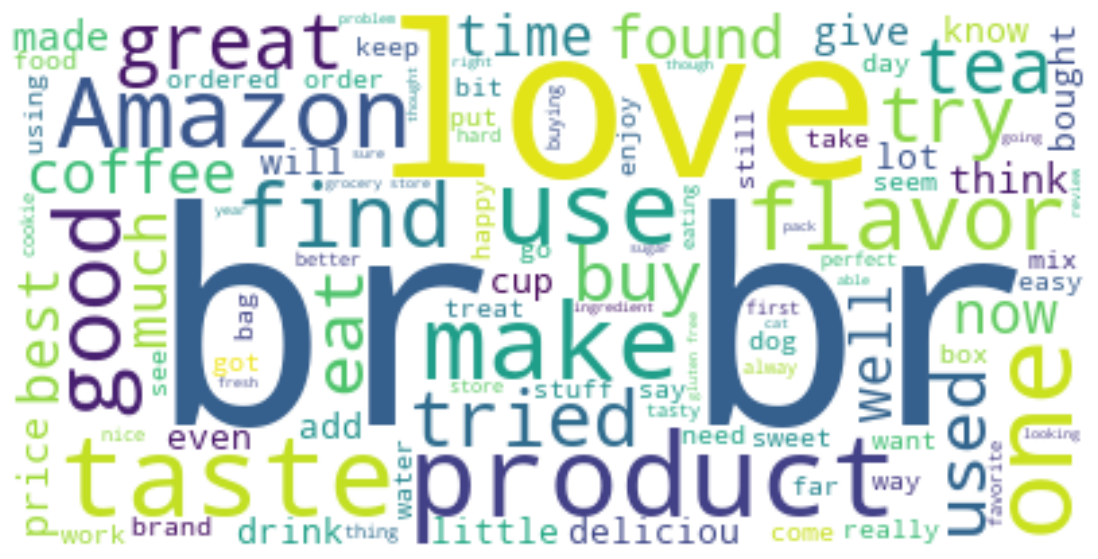

In [32]:
pos = data2.loc[data2.review == 'Positive'].Text
text = " ". join(review for review in pos.astype(str))
generate_wcloud(text)

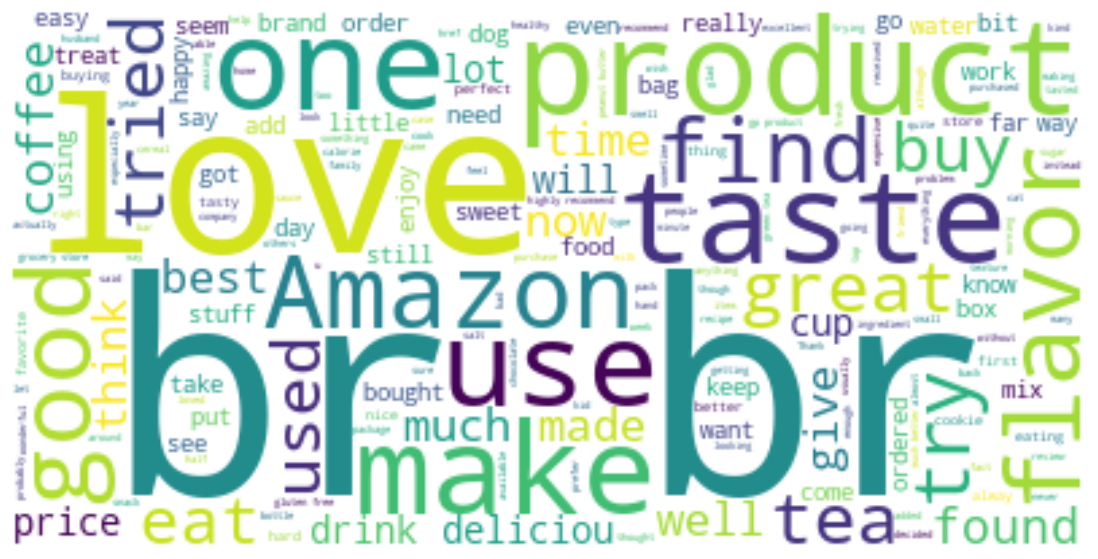

In [33]:
#nagetive review wordcloud
Neg = data2.loc[data2.review == 'negative'].Text
text = " ". join(review for review in pos.astype(str))
generate_wcloud(text)

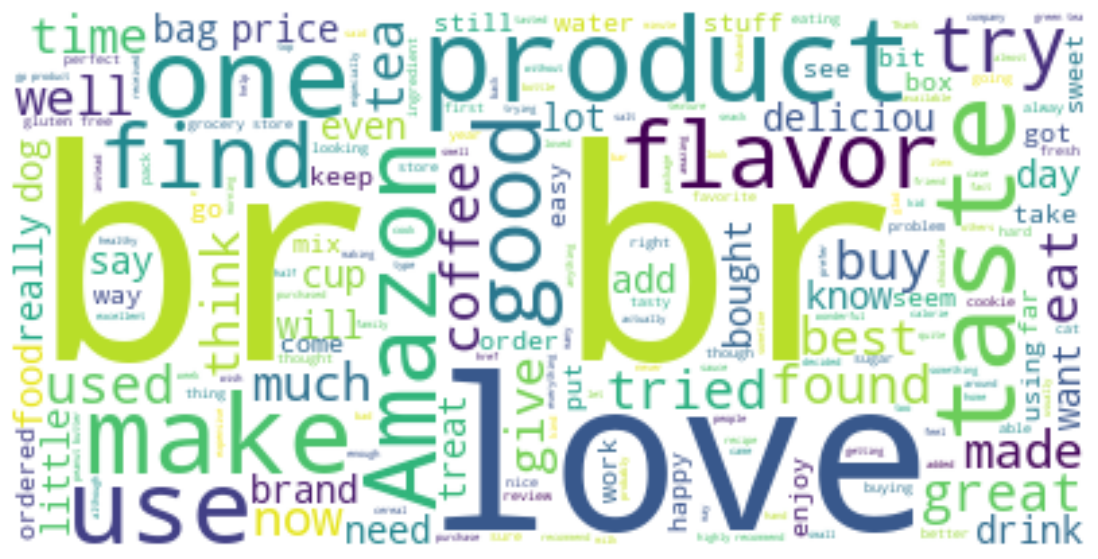

In [34]:
#neutral wordcloud
Neut = data2.loc[data2.review == 'neutral'].Text
text = " ". join(review for review in pos.astype(str))
generate_wcloud(text)

In [156]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

In [36]:
### spliting data set into training and testing dataset
X= data2.Text
y=data2.Score

X_train, X_test , y_train, y_test=train_test_split(X,y, test_size=0.20, random_state=1, stratify=y)

In [37]:
X_train.shape, X_test.shape

((314940,), (78735,))

In [38]:
bow_vectorizer = CountVectorizer(max_features=10000)
bow_vectorizer.fit(X_train)
#tranform
bow_X_train = bow_vectorizer.transform(X_train)
bow_X_test = bow_vectorizer.transform(X_test)

In [39]:
tfidf_vectorizer = TfidfVectorizer(max_features=10000)
tfidf_vectorizer.fit(X_train)
#tranform
tfidf_X_train = tfidf_vectorizer.transform(X_train)
tfidf_X_test = tfidf_vectorizer.transform(X_test)

In [40]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

labels = label_encoder.classes_.tolist()  # Correct attribute name
print(labels)

[1, 2, 3, 4, 5]


In [41]:
def train_and_eval(model, trainX, trainY, testX, testY):
  #training
  model.fit(trainX, trainY)

  #predictions
  y_preds_train= model.predict(trainX)
  y_preds_test = model.predict(testX)

  #evaluation

  print()
  print(model)
  print(f" Train accuracy score : { accuracy_score(y_train, y_preds_train)}")
  print(f" Train accuracy score : { accuracy_score(y_test, y_preds_train)}")
  print('\n', 40*'-')

In [42]:
#hyperparameter

from sklearn.linear_model import LogisticRegression

C_values = [0.1, 1, 10]

for c in C_values:
    # Define and train the model
    model = LogisticRegression(C=c, max_iter=500, random_state=1)
    model.fit(bow_X_train, y_train)

    # Evaluate the model
    train_accuracy = model.score(bow_X_train, y_train)
    test_accuracy = model.score(bow_X_test, y_test)

    # Print the results
    print(f"For C = {c}:")
    print(f"  Train accuracy: {train_accuracy:.4f}")
    print(f"  Test accuracy: {test_accuracy:.4f}")


For C = 0.001:
  Train accuracy: 0.7015
  Test accuracy: 0.6972


C:\Users\Md Tareef\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


For C = 0.01:
  Train accuracy: 0.7333
  Test accuracy: 0.7182


C:\Users\Md Tareef\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


For C = 0.1:
  Train accuracy: 0.7516
  Test accuracy: 0.7211


C:\Users\Md Tareef\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


For C = 1:
  Train accuracy: 0.7554
  Test accuracy: 0.7177


C:\Users\Md Tareef\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


For C = 10:
  Train accuracy: 0.7559
  Test accuracy: 0.7182


In [43]:
from sklearn.naive_bayes import MultinomialNB

alphas = [0, 0.8, 1]

models = [MultinomialNB(alpha=a) for a in alphas]

for model in models:
    model.fit(bow_X_train, y_train)
    train_accuracy = model.score(bow_X_train, y_train)
    test_accuracy = model.score(bow_X_test, y_test)

    print(f"For alpha = {model.alpha}:")
    print(f"  Train accuracy: {train_accuracy:.4f}")
    print(f"  Test accuracy: {test_accuracy:.4f}")



C:\Users\Md Tareef\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:624: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
C:\Users\Md Tareef\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:633: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


For alpha = 0:
  Train accuracy: 0.6868
  Test accuracy: 0.6715
For alpha = 0.2:
  Train accuracy: 0.6866
  Test accuracy: 0.6718
For alpha = 0.6:
  Train accuracy: 0.6864
  Test accuracy: 0.6717
For alpha = 0.8:
  Train accuracy: 0.6864
  Test accuracy: 0.6720
For alpha = 1:
  Train accuracy: 0.6863
  Test accuracy: 0.6721


In [44]:
### best model 

In [45]:
bmodel = LogisticRegression(C=1, max_iter=500, random_state=1)
bmodel.fit(tfidf_X_train, y_train)

C:\Users\Md Tareef\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1, max_iter=500, random_state=1)

In [46]:
# predictions
y_preds_train= bmodel.predict(tfidf_X_train)
y_preds_test= bmodel.predict(tfidf_X_test)



In [47]:
print(f" Train accuracy score : { accuracy_score(y_train, y_preds_train)}")
print(f" Test accuracy score : { accuracy_score(y_test, y_preds_test)}")

 Train accuracy score : 0.7495935733790563
 Test accuracy score : 0.7273258398425096


In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_cm(y_true, y_pred, labels):
    plt.figure(figsize=(6,6))
    
    cm = confusion_matrix(y_true, y_pred, normalize='true')
    
    sns.heatmap(
        cm, annot=True, cmap='Blues', cbar=False, fmt='.2f',
        xticklabels=labels, yticklabels=labels)
    
    #plt.xlabel('Predicted Label')
    #plt.ylabel('True Label')
    #plt.title('Confusion Matrix')
    
    return plt.show()


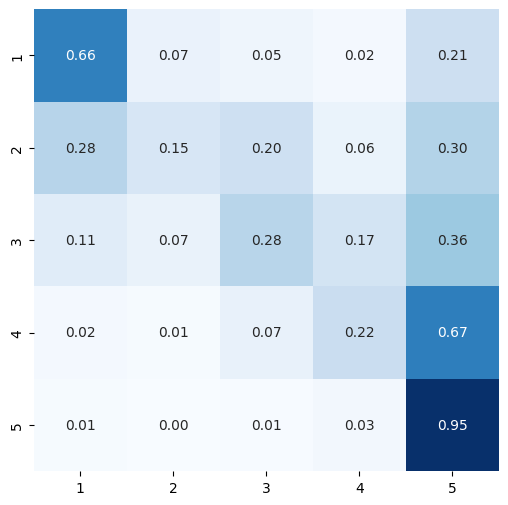

In [57]:
plot_cm(y_test, y_preds_test, labels)

In [58]:
import pickle

In [59]:
with open("transformer.pkl", "wb") as f:
    pickle.dump(tfidf_vectorizer, f)
    
with open("sentiment-prediction-model.pkl", "wb") as f:
    pickle.dump(bmodel, f)

In [164]:
### prediction on single review 
data2['review'] = data2['Score'].apply(lambda x : map_review(x))

In [165]:
def get_sentiment(review):
    # Preprocess the review text
    x = Text_preprocessor(review)
    # Vectorize the preprocessed text using the TF-IDF vectorizer
    x = tfidf_vectorizer.transform([x])
    # Predict sentiment
    y_pred = bmodel.predict(x)
    # Return the sentiment label
    return labels[int(y_pred)]

In [166]:
review = "this chips packet is very tasty. I highly recommend this!"
print(f"This is a {get_sentiment(review)} review!")

This is a 5 review!


In [168]:
review = "This product is average!"
print(f"This is a {get_sentiment(review)} review!")

This is a 3 review!
